# Assignment

- You are given several data sets in text format.  For each of them:
  - Plot the data along with errorbars - explain how you obtain the size of the errorbars.
  - Propose a possible best curve fit for each of the data sets.  The exact nature of the function is not given, but some clues may be available.  
  - Perform a curve fitting using appropriate techniques for each of the data.  You need to explain whether you are choosing to use a linear or nonlinear curve fit, and why it is the right approach.  Comment on the accuracy of your approach and whether it gives a good result, or something better could have been done.
- For the straight line fit from the example above, compare the time taken, and accuracy of the fit, for `lstsq` *vs* `curve_fit`.  Comment on your observations.

# Straight Line Fit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

def create_dataset(filename):
    data = np.loadtxt(filename)
    
    x = data[:, 0]
    y = data[:, 1]
    return x, y

This piece of code takes a filename as an argument and extracts data from this file. After it makes 2 array's `x` and `y` that represents the dataset and returns them.

In [2]:
def straight_line(x, m, c):
    y_est = []
    for i in x:
        y_est.append(i*m + c)

    return y_est

The function called `straight_line` takes three arguments: `x`, `m`, and `c`. The purpose of this function is to compute the y-values of a straight line given the x-values, slope, and intercept.

In [3]:
def mean_error(x, y, m, c):
    y_est = []
    for i in x:
        y_est.append(i*m + c)
        
    y_prime = np.array(y)
    y_new_prime = np.array(y_est)
    
    mean_error = np.square(np.subtract(y_prime, y_new_prime)).mean()
    return mean_error 

The function `mean_error` takes in 4 arguments as shown and calculate the mean error between the given y coordinate in the dataset and the y coordinate which we calculate from the above `straight_line` function using x-values, slope, and intercept.

In [4]:
def least_square(filename):
    x, y = create_dataset(filename)
    M = np.column_stack([x, np.ones(len(x))])
    
    (p1, p2), _, _, _ = np.linalg.lstsq(M, y, rcond=None)
    
    return p1, p2

The `least_square` function accepts a filename as input and returns the slope and y-intercept of the best-fit line for the data in the file. The function does this by first using the `create_dataset` function to extract the x and y values from the file. 

It generates a matrix M with two columns, one for the x-values and the other for the ones. The np.linalg.lstsq() function is used to fit a straight line to the data using the least-squares method. The best-fit line's slope and y-intercept are returned as a tuple `(p1, p2)`.

In [5]:
def plotting_line_square(filename):
    x, y = create_dataset(filename)
    p1, p2 = least_square(filename)
    y_est = straight_line(x, p1, p2)
    error = mean_error(x, y, p1, p2)
    
    plt.plot(x, y, 'gx')
    plt.plot(x, y_est, linewidth=5)
    plt.errorbar(x[::10], y[::10], np.std(y - y_est), fmt='ro')
    
    print(f"The estimated equation is {p1} x + {p2}")
    print(f"Mean error using least square method is {error}")

This function `plotting_line_square` plots down the scatter plot of the x and y coordinates given in the dataset along with that it also plots the line graph of estimated y using the straight line function and x.

The error bars are generated using `np.random.randn()` to generate normally distributed random noise and `np.std()` to calculate the standard deviation of the difference between the actual and predicted y-values. The width of an error bar is determined by this standard deviation of the data only.

Finally, the function prints the estimated equation of the best-fit line and the mean error we get using the least squares method

The estimated equation is 2.791124245414921 x + 3.848800101430749
Mean error using least square method is 3.983412380573276
614 µs ± 570 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


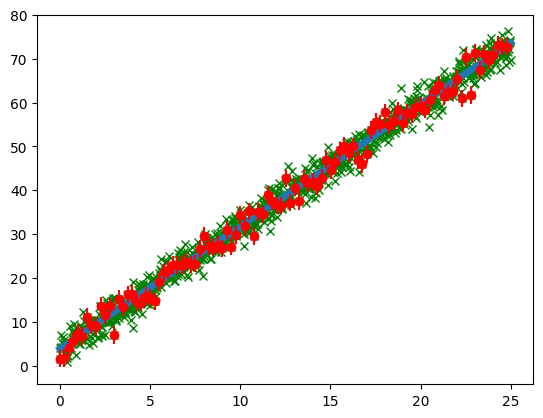

In [6]:
plotting_line_square("Straightline.txt")
%timeit least_square("Straightline.txt")

In [7]:
from scipy.optimize import curve_fit

def curvefit_line(filename):
    x, y = create_dataset(filename)
    M = np.column_stack([x, np.ones(len(x))])
    (m_new, c_new), _ = curve_fit(straight_line, x, y)

    return m_new, c_new

Using the `curve_fit` function from the scipy library, the `curvefit_line` function takes a filename as input and returns the slope and y-intercept of the best-fit line for the data in the file. 

By minimising the sum of the squared difference between the data and the line, the curve fit function fits the line to the data. As a tuple `(m new, c new)`, the function returns the slope and y-intercept of the best-fit line.

In [8]:
def plotting_line_curve(filename):
    x, y = create_dataset(filename)
    m, c = curvefit_line(filename)
    
    y_est = straight_line(x, m, c)
    error = mean_error(x, y, m, c)
    
    plt.plot(x, y, 'rx')
    plt.plot(x, y_est, linewidth = 5)
    plt.errorbar(x[::10], y[::10], np.std(y - y_est), fmt='yo')
    
    print(f"The estimated equation is {m} x + {c}")
    print(f"Mean error using least square method is {error}")

This piece of code is similar to that we did while calculating slope and intercept of straight line using `least_square` method.

The estimated equation is 2.7911242472208153 x + 3.848800089588013
Mean error using least square method is 3.983412380573275
2.34 ms ± 5.68 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


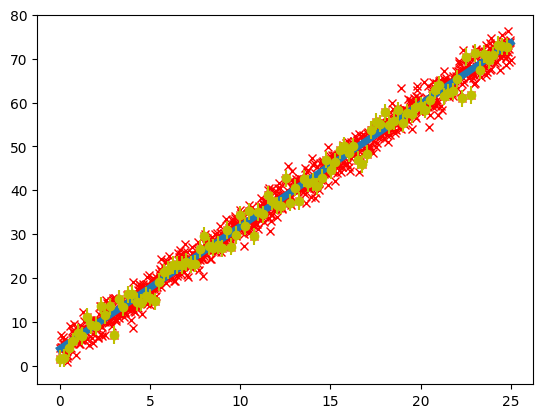

In [9]:
plotting_line_curve("Straightline.txt")
%timeit curvefit_line("Straightline.txt")

The mean of both the method's `least_square` and `curve_fit` is approximately the same, but there's a huge difference in their time.

Concept: The `least_squares` method minimizes the sum of squared errors between the observed data and the predicted values, while the `curve_fit` method finds the values of the model parameters that minimize the sum of squared errors using a non-linear optimization algorithm.

The reason for `least_square` is faster because it is a linear regression method and can be solved analytically using matrix operations. On the other hand `curve_fit` method requires a non-linear optimization algorithm, which is much lenghtier.

# Fourier Series Fit:

In [10]:
def sin(x, p1, p2):
    return p1 * np.sin(2 * np.pi * p2 * x)

In [11]:
def fund_freq():
    x, y = create_dataset("Sine.txt")
    (p1, p2), _ = curve_fit(sin, x, y)
    fundamental_freq = p2
    
    return fundamental_freq

The `fund_freq` function reads a dataset from a file containing sine wave data, uses the `curve_fit` function to fit a sine wave to the data, and extracts the `frequency parameter` from the fitted curve. The frequency parameter is returned as the fundamental frequency of the sine wave.

In [12]:
def fourier_graph(x, p1, p2, p3): 
    p0 = fund_freq()
    sine_fourier = 0
    
    n = 3
    p = [p1, p2, p3]
    for i in range(1,n+1):
        sine_fourier += p[i-1] * np.sin(2 * (2*i-1) * np.pi * p0 * x)
        
    return sine_fourier

The function `fourier_graph` takes parameters `x`, `p1`, `p2`, and `p3`. It computes a `Fourier series` for a given set of parameters p1, p2, and p3, and returns the resulting sine wave over the input array x. It uses a loop to compute the amplitudes up to a specified number of terms (n = 3), with each term being a sine wave with a frequency that is a multiple of the fundamental frequency computed by the fund_freq() function.

Here the given dataset is a sum of `3` sine waves. The following conclusion was reached by trial and error cases with various values and n and checking it's ability to fit with the given scattered plot. 

The fourier transform equation can be represented as:
6.010358904660579sin(0.4016623847634744t) + 2.0001319780498603sin(30.4016623847634744t) + 0.9627914876987335sin(50.4016623847634744t)


<ErrorbarContainer object of 3 artists>

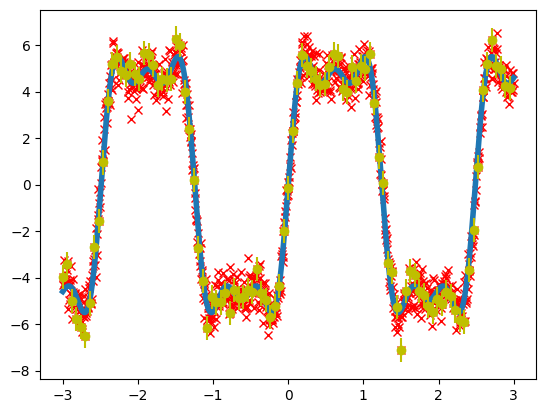

In [14]:
x, y = create_dataset("sine.txt")
p0 = fund_freq()

(a, b, c), _ = curve_fit(fourier_graph, x, y)
print(f"The fourier transform equation can be represented as:\n{a}sin({p0}t) + {b}sin(3{p0}t) + {c}sin(5{p0}t)")

y_est = []
for i in x:
    y_est.append(fourier_graph(i, a, b, c))

plt.plot(x, y, 'rx')
plt.plot(x, y_est, linewidth = 4)
plt.errorbar(x[::10], y[::10], np.std(y - y_est), fmt='yo')

The code reads a dataset from a file named `sine.txt` and fits a Fourier transform equation to the data using the `curve_fit` function.

The Fourier transform equation is composed of `three sine functions` with three unknown coefficients `a`, `b`, and `c`, and a fundamental frequency `p0`, which is obtained from the `fund_freq()` function. The for loop computes the estimated y values for each x value using the Fourier transform equation and the fitted coefficients a, b, and c. 

The resulting plot shows the original data points, the curve obtained from the Fourier transform equation, and error bars representing the difference between the original data and the estimated values.

In [15]:
A = float(input("Enter a number "))
Y = fourier_graph(A, a, b, c)
print(Y)

Enter a number 50
5.485283458834958


# Planck's Constant Fit:

In [16]:
import math

def plank_law(u, h, T):
    k = 1.38e-23
    c = 3.0e+8
    exp = np.e**((h*u)/(k*T))
    return (2*h*u**3)/(c**2*(exp - 1))

Making a function called `plank_law` which will return the black body intensity for the given frequency provided temperature, speed of light and planck's constant are already given.

The value of planck's constant (h) = 6.643229745016755e-34
The value of Temperature (T) = 6011.361512844751 K
Mean error using curve fit method is 9.84363342765081e-19


<ErrorbarContainer object of 3 artists>

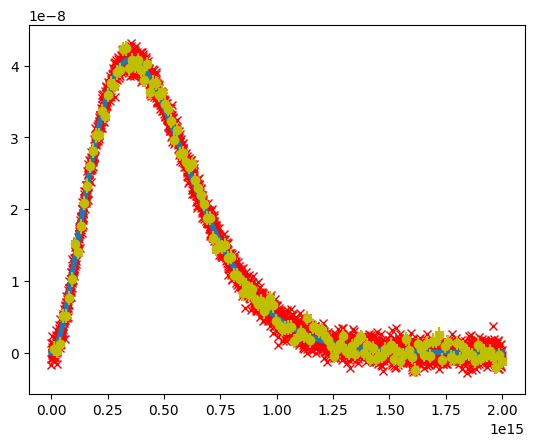

In [17]:
u, y = create_dataset("Plank.txt")

(h_new, T_new), _ = curve_fit(plank_law, u, y, p0 = [6.6e-34, 4000])
print(f"The value of planck's constant (h) = {h_new}\nThe value of Temperature (T) = {T_new} K")

y_new = []
for i in u:
    y_new.append(plank_law(i, h_new, T_new))
    
mean_error = np.square(np.subtract(y_new, y)).mean()
print(f"Mean error using curve fit method is {mean_error}")

plt.plot(u, y, 'rx')
plt.plot(u, y_new, linewidth = 4)
plt.errorbar(u[::20], y[::20], np.std(y - y_new), fmt='yo')

Here `curve_fit()` function is used to fit a Planck's law function to the data in the arrays `u` and `y`. The function `plank_law()` is used as the model function to be fitted. The initial values for the fitting parameters are provided as the list [6.6e-34, 4000] to the p0 argument. The fitted values of the two parameters `Planck's constant` (h_new) and `Temperature of operation` (T_new) are so found.

Using this data scatter fit of the given dataset, line plot calculated y value for all frequencies and error bar represeting the difference between actual y and calculated y is plotted.

In [18]:
A = float(input("Enter frequency "))
Y = plank_law(A, h_new, T_new)
print(Y)

Enter frequency 50
4.6093620207361264e-33


# Unknown Fit:

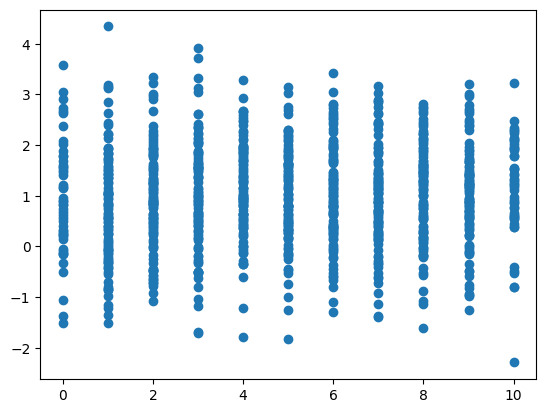

In [19]:
X, Y = create_dataset("Unknown.txt")
plt.scatter(X, Y)
plt.show()

It seems to be a many to one function just from this discription. So I am using 3 methods to derive to some conclusion:
1. Histogram
2. Random Curve Fitting
3. Mode Analysis

In [20]:
def mean_square_error(Y_new, Y_old):
    error = 0
    for i in range(len(Y_new)):
        error += (Y_new[i] - Y_old[i])**2
        
    error /= len(Y_new)
    return error

Creating a function to calculate mean error between calculated value of Y and actual value of Y to ease the process of calculation.

1.064766327634763 0.9570572261338465


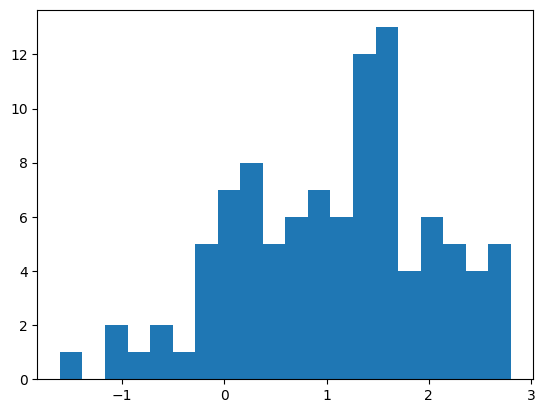

In [21]:
Y1 = []
for i in range(len(X)):
    if X[i] == 8:
        Y1.append(Y[i])
Y1=np.array(Y1)
plt.hist(Y1, bins=20)

sum = 0
for i in range(len(Y1)):
    sum += Y1[i]
avg = sum / len(Y1)
print(avg, np.std(Y1))

This block of code plot's the frequency of Y as a `histogram` for a given value of X. In this block of code as a random value I am taking X = 8. Along with histogram, mean and standard deviation for the particular set of Y data is also being calculated

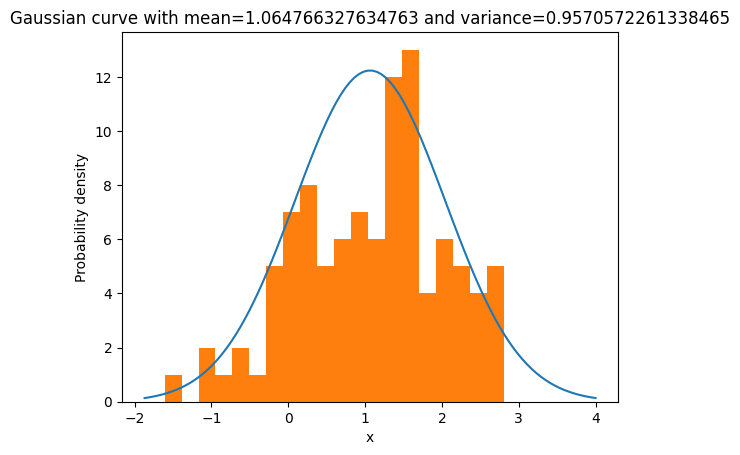

In [22]:
mu, variance = avg, np.std(Y1)

x = np.linspace(mu - 3*np.sqrt(variance), mu + 3*np.sqrt(variance), 100)
y = 1/np.sqrt(2*np.pi*variance) * np.exp(-(x-mu)**2/(2*variance))*30

plt.plot(x, y)
plt.hist(Y1, bins=20)
plt.title('Gaussian curve with mean='+str(mu)+' and variance='+str(variance))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.show()

The above plotted histogram seemed to be kind of gaussian distribution. So after plotting gaussian distribution for the mean and standard deviation calculated from the previous block of code the two graphs were not coinciding. 

I multiplied the gaussian distribution with 30 to somewhat coincide with the histogram plotted. So this would not be the correct way of analysing the following piece of dataset.

The base error to find error's of further curve fitting is 1.0120618864607986


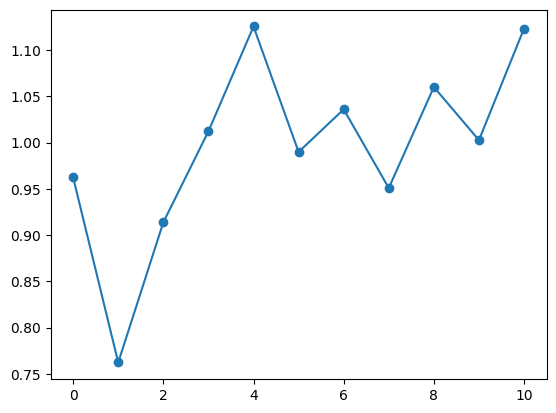

In [23]:
X, Y = create_dataset("Unknown.txt")

Mean_Y = list(range(11))
Count = list(range(11))
for i in range(len(X)):
    x = X[i]
    y = Y[i]
    Mean_Y[int(x)] += y
    Count[int(x)] += 1
for j in range(len(Mean_Y)):
    Mean_Y[j] /= Count[j]

Xprime = [0,1,2,3,4,5,6,7,8,9,10]

def meanvalues(x, y):
    return(y[int(x)])

Y_est =[]
for i in X:
    Y_est.append(meanvalues(i, Mean_Y))
    
plt.scatter(Xprime, Mean_Y)
plt.plot(Xprime, Mean_Y)
base_value = mean_square_error(Y, Y_est)
print(f"The base error to find error's of further curve fitting is {base_value}")

For randomly fitting curves, there is a need to set up a base parameter over which we would judge things and accuracy so for that I am making an array which will store the average for all the values of Y for a given value of X.

Given this array of mean values of Y, above graph for X and mean values of Y was plotted which itself has an error of 1.012%. I will use this error as the base error for finding the accuracy of the subsequent curve fits.

The mean error with respect to base error is 0.6787894458959761


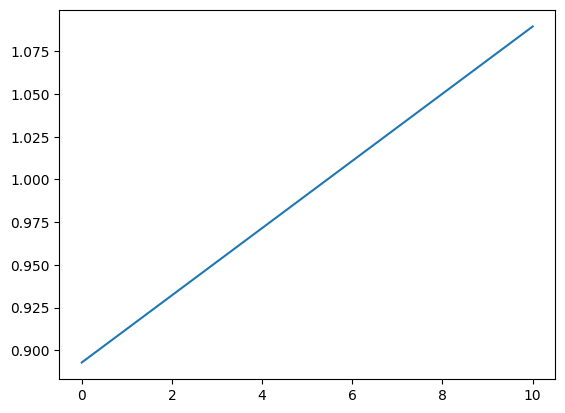

In [24]:
def model_func_linear(x, a, b):
    return a*x + b

(a, b), pcov = curve_fit(model_func_linear, X, Y)

Y_est = []
for i in X:
    Y_est.append(a*i + b)
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 0.6219291655163925


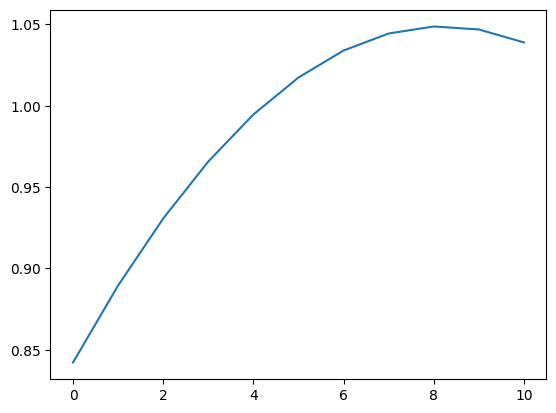

In [25]:
def model_func_binomial(x, a, b, c):
    return a*x**2 + b*x + c

# Fit the model to the data
(a, b, c), pcov = curve_fit(model_func_binomial, X, Y)

Y_est = []
for i in X:
    Y_est.append(a*i**2 + b*i + c)
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 0.5785202539831986


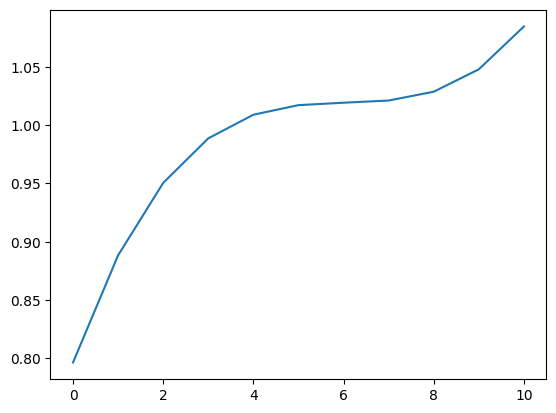

In [26]:
def model_func_cubic(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# Fit the model to the data
(a, b, c, d), pcov = curve_fit(model_func_cubic, X, Y)

Y_est = []
for i in X:
    Y_est.append(a*i**3 + b*i**2 + c*i + d)
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 0.3734742732173052


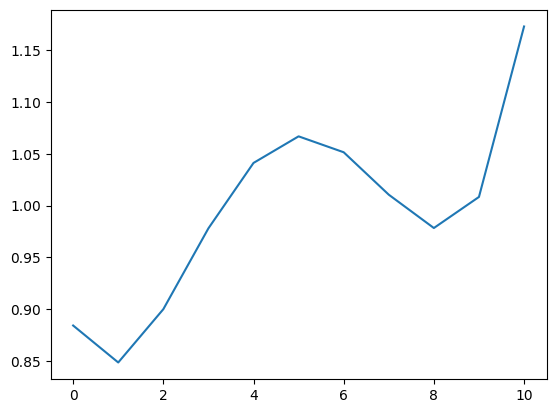

In [27]:
def model_func_deg4(x, a, b, c, d, e):
    return a*x**3 + b*x**2 + c*x + d + e*x**4

# Fit the model to the data
(a, b, c, d, e), pcov = curve_fit(model_func_deg4, X, Y)

Y_est = []
for i in X:
    Y_est.append(a*i**3 + b*i**2 + c*i + d + e*i**4)
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 0.20867154172102295


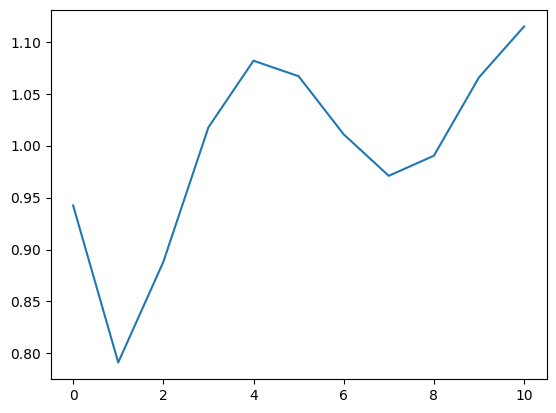

In [28]:
def model_func_deg5(x, a, b, c, d, e, f):
    return a*x**3 + b*x**2 + c*x + d + e*x**4 + f*x**5

# Fit the model to the data
(a, b, c, d, e, f), pcov = curve_fit(model_func_deg5, X, Y)

Y_est = []
for i in X:
    Y_est.append(a*i**3 + b*i**2 + c*i + d + e*i**4 + f*i**5)
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 0.1356602069347541


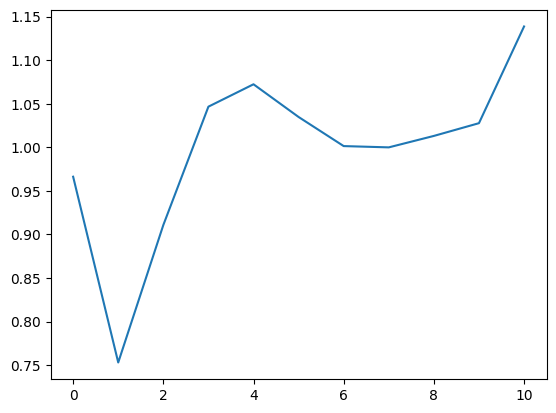

In [29]:
def model_func_deg6(x, a, b, c, d, e, f, g):
    return a*x**3 + b*x**2 + c*x + d + e*x**4 + f*x**5 + g*x**6 

# Fit the model to the data
(a, b, c, d, e, f, g), pcov = curve_fit(model_func_deg6, X, Y)

Y_est = []
for i in X:
    Y_est.append(a*i**3 + b*i**2 + c*i + d + e*i**4 + f*i**5 + g*i**6)
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 0.11634067752835135


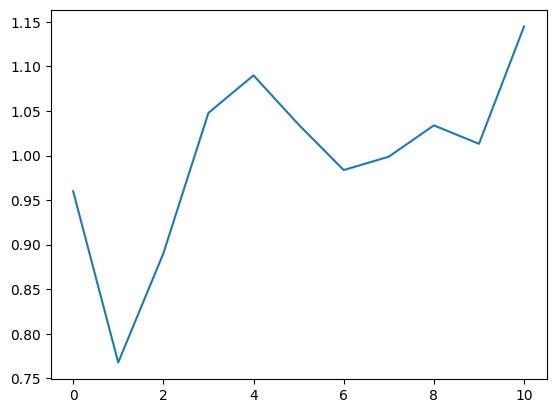

In [30]:
def model_func_deg7(x, a, b, c, d, e, f, g, h):
    return a*x**3 + b*x**2 + c*x + d + e*x**4 + f*x**5 + g*x**6 + h*x**7

# Fit the model to the data
(a, b, c, d, e, f, g, h), pcov = curve_fit(model_func_deg7, X, Y)

Y_est = []
for i in X:
    Y_est.append(a*i**3 + b*i**2 + c*i + d + e*i**4 + f*i**5 + g*i**6 + h*i**7)
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 0.10399817787290258


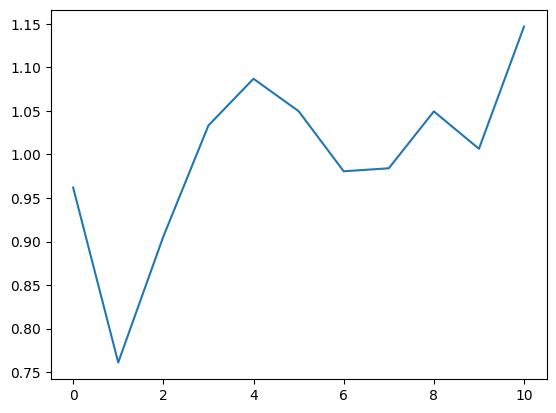

In [31]:
def model_func_deg8(x, a, b, c, d, e, f, g, h, j):
    return a*x**3 + b*x**2 + c*x + d + e*x**4 + f*x**5 + g*x**6 + h*x**7 + j*x**8

# Fit the model to the data
(a, b, c, d, e, f, g, h, j), pcov = curve_fit(model_func_deg8, X, Y)

Y_est = []
for i in X:
    Y_est.append(a*i**3 + b*i**2 + c*i + d + e*i**4 + f*i**5 + g*i**6 + h*i**7 + j*i**8)
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 0.1013679711918036


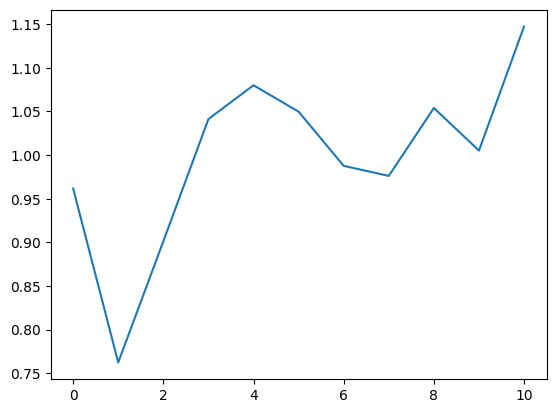

In [32]:
def model_func_deg9(x, a, b, c, d, e, f, g, h, j, k):
    return a*x**3 + b*x**2 + c*x + d + e*x**4 + f*x**5 + g*x**6 + h*x**7 + j*x**8 + k*x**9

# Fit the model to the data
(a, b, c, d, e, f, g, h, j, k), pcov = curve_fit(model_func_deg9, X, Y)

Y_est = []
for i in X:
    Y_est.append(a*i**3 + b*i**2 + c*i + d + e*i**4 + f*i**5 + g*i**6 + h*i**7 + j*i**8 + k*i**9)
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 0.003729129190629394


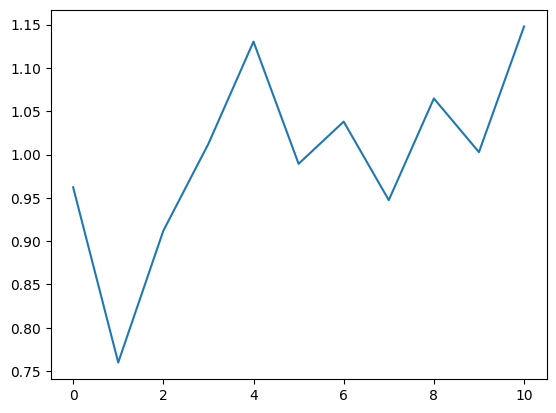

In [33]:
def model_func_deg10(x, a, b, c, d, e, f, g, h, j, k, l):
    return a*x**3 + b*x**2 + c*x + d + e*x**4 + f*x**5 + g*x**6 + h*x**7 + j*x**8 + k*x**9 + l*x**10

# Fit the model to the data
(a, b, c, d, e, f, g, h, j, k, l), pcov = curve_fit(model_func_deg10, X, Y)

Y_est = []
for i in X:
    Y_est.append(a*i**3 + b*i**2 + c*i + d + e*i**4 + f*i**5 + g*i**6 + h*i**7 + j*i**8 + k*i**9 + l*i**10)
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 0.0037289402285129044
Enter a number 50
1.9166302665663375e+18


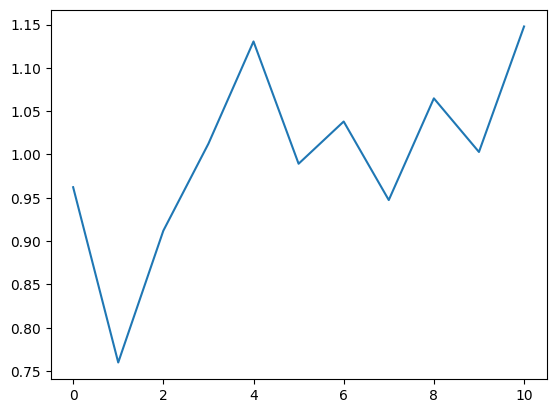

In [34]:
def model_func_deg11(x, a, b, c, d, e, f, g, h, j, k, l, m):
    return a*x**3 + b*x**2 + c*x + d + e*x**4 + f*x**5 + g*x**6 + h*x**7 + j*x**8 + k*x**9 + l*x**10 + m*x**11

# Fit the model to the data
(a, b, c, d, e, f, g, h, j, k, l, m), pcov = curve_fit(model_func_deg11, X, Y)

Y_est = []
for i in X:
    Y_est.append(a*i**3 + b*i**2 + c*i + d + e*i**4 + f*i**5 + g*i**6 + h*i**7 + j*i**8 + k*i**9 + l*i**10 + m*i**11)
    
plt.plot(X, Y_est)
err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

X_input = float(input("Enter a number "))
Y_output = model_func_deg11(X_input, a, b, c, d, e, f, g, h, j, k, l, m)
print(Y_output)

The mean error with respect to base error is 0.8972050562460845


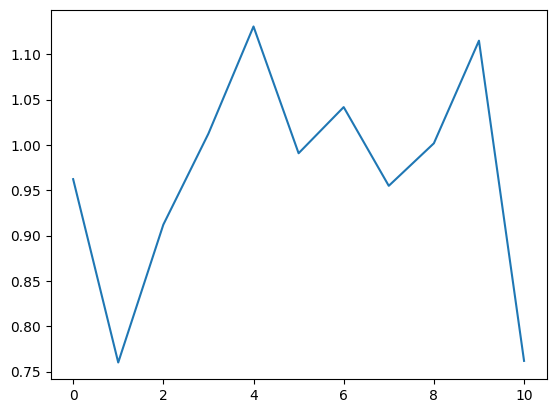

In [35]:
def model_func_deg12(x, a, b, c, d, e, f, g, h, j, k, l, m, n):
    return a*x**3 + b*x**2 + c*x + d + e*x**4 + f*x**5 + g*x**6 + h*x**7 + j*x**8 + k*x**9 + l*x**10 + m*x**11 + n*x**12

# Fit the model to the data
(a, b, c, d, e, f, g, h, j, k, l, m, n), pcov = curve_fit(model_func_deg12, X, Y)

Y_est = []
for i in X:
    Y_est.append(a*i**3 + b*i**2 + c*i + d + e*i**4 + f*i**5 + g*i**6 + h*i**7 + j*i**8 + k*i**9 + l*i**10 + m*i**11 + n*i**12)
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 7.565036418523878


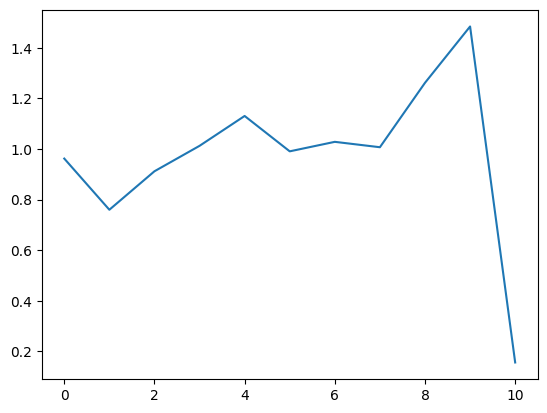

In [36]:
def model_func_deg13(x, a, b, c, d, e, f, g, h, j, k, l, m, n, o):
    return a*x**3 + b*x**2 + c*x + d + e*x**4 + f*x**5 + g*x**6 + h*x**7 + j*x**8 + k*x**9 + l*x**10 + m*x**11 + n*x**12 + o*x**13

# Fit the model to the data
(a, b, c, d, e, f, g, h, j, k, l, m, n, o), pcov = curve_fit(model_func_deg13, X, Y)

Y_est = []
for i in X:
    Y_est.append(a*i**3 + b*i**2 + c*i + d + e*i**4 + f*i**5 + g*i**6 + h*i**7 + j*i**8 + k*i**9 + l*i**10 + m*i**11 + n*i**12 + o*i**13)
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 41.59213915422537


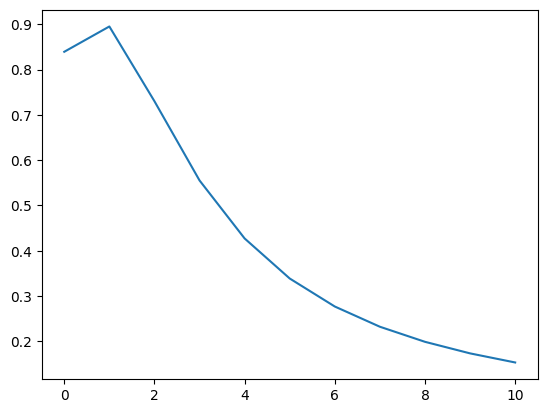

In [37]:
def model_func_fraction_linear(x, a, b, c, d):
    return (a + b*x)/(c + d*x)

# Fit the model to the data
(a, b, c, d), pcov = curve_fit(model_func_fraction_linear, X, Y)

Y_est = []
for i in X:
    Y_est.append((a + b*i)/(c + d*i**2))
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 3286.733066952631


/var/folders/14/2h8qtqwd5p34n11kc0dtkg200000gn/T/ipykernel_27556/1004966119.py:2: RuntimeWarning: divide by zero encountered in log
  return (b*np.log(x) + c)


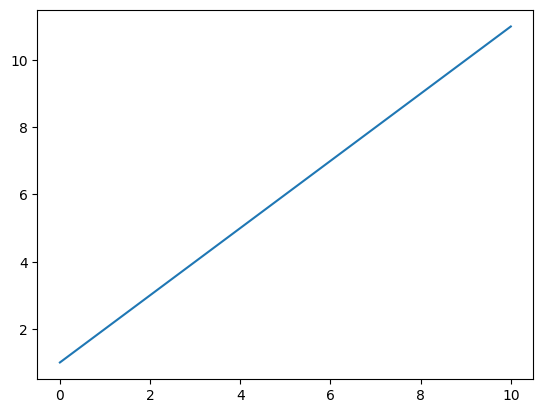

In [38]:
def model_func_log(x, b, c):
    return (b*np.log(x) + c)

# Fit the model to the data
(b, c), pcov = curve_fit(model_func_log, X, Y)

Y_est = []
for i in X:
    Y_est.append((b*i + c))
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

The mean error with respect to base error is 99.80370837486932


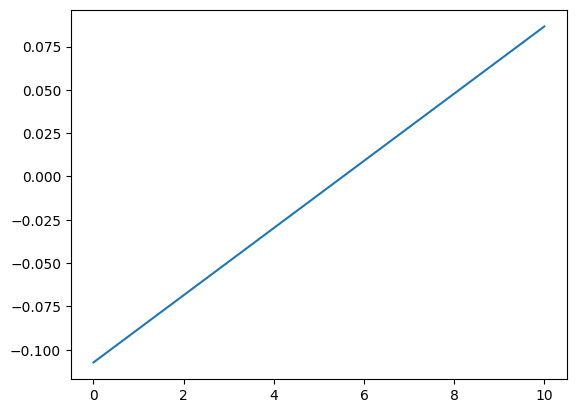

In [39]:
def model_func_exp(x, b, c):
    return (np.exp(b*x + c))

# Fit the model to the data
(b, c), pcov = curve_fit(model_func_exp, X, Y)

Y_est = []
for i in X:
    Y_est.append((b*i + c))
    
plt.plot(X, Y_est)

err = abs(((mean_square_error(Y, Y_est)-base_value) * 100)/base_value)
print(f"The mean error with respect to base error is {err}")

Conclusions:
1. The error of the random curve fitting decreases when degree of polynomial increase from 1 to 11, attains minimum value at degree 11 and then it starts to increase further as we increase the degree of polynomial
2. Another type of functions such as fraction, logarithmic, exponential were also not able to fit the given data as they were producing a large amount of error
3. So the best fit for the given data is a polynomial of degree 11 which has an error of 0.0037289402285129044% with respect to the base error.
4. **But for predicting values of some random X this 11 degree polynomial would not suffice. As here X was untill 11 so 11 degree polynomial sufficed. Therefore for an integer value of X we need a polynomial of degree X to predict it's accurate value**
5. When we take a certain value of X, the coeffiecient of degree higher than X are done to be 0.

In [40]:
from scipy import stats

# Define a list to hold the sublists of y-values
Y_mode_first = [[] for _ in range(11)]

# Loop through the x and y data and append the y-value to the appropriate sublist in y_o
for i in range(11):
    for j in range(len(X)):
        if X[j] == i:
            Y_mode_first[i].append(Y[j])

Y_mode = []
for j in range(11):
    Y_round = [round(i, 2) for i in Y_mode_first[j]]
    Y_mode.append(stats.mode(Y_round, keepdims = False)[0])

print(Y_mode)

[-0.15, -0.43, -0.72, 1.56, -0.34, 0.81, 0.15, 0.14, 0.54, 0.7, 0.39]


This method considered a complete different possibility for the given datasheet.
Let's say the given is an experimental data for different values of X so in this case in order to predict values of some random X in the view of curve fitting we will use the value of Y which has occured the most. In mathematical terms this is called as `Mode`.

So this piece of code calculated the `Mode` of the different values of `Y` for a give single value of `X`.

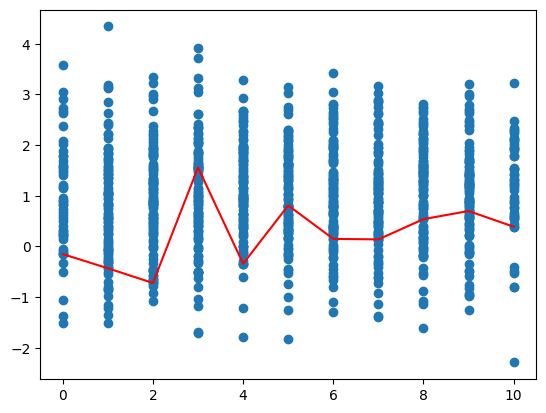

In [41]:
plt.scatter(X, Y)
plt.plot(Xprime, Y_mode, 'r')

This graph shows the mode of all values of Y for a given X. Using this information and plotting it for some function more values can be predicted in the same way I did graph fitting or curve fitting above.